In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, Binarizer
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('flightsOrganized.csv')
df.head()

# Imported all the necessary libraries and the data
# All this data has been scaled from a previous jupyter notebook I worked on
# If you want to see how I did this, just let me know!
# Note: the feature 'LOG_DELAY' is just the log of the DEPARTURE_DELAY feature

,Day & Month,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,...,ATL,ORD,DFW,DEN,LAX,PHX,SFO,IAH,LAS,MSP
0,1-1-2015,0.003817,0.000417,0.359281,0.055276,0.005419,0.420784,0.389313,0.420792,0.510259,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1-1-2015,0.008058,0.007086,0.395210,0.075377,0.013756,0.431005,0.410687,0.425743,0.502593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1-1-2015,0.008058,0.005836,0.377246,0.070352,0.012088,0.429302,0.392366,0.412541,0.512965,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1-1-2015,0.010178,0.007920,0.377246,0.085427,0.015423,0.313458,0.314504,0.326733,0.343179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1-1-2015,0.010178,0.007503,0.371257,0.050251,0.012088,0.252129,0.222901,0.240924,0.277790,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Looking at all of the necessary feature names
df.columns

Index(['Day & Month', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'LOG_DELAY', 'AA',
       'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US', 'VX',
       'WN', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'PHX', 'SFO',
       'IAH', 'LAS', 'MSP'],
      dtype='object')

In [2]:
# Since the NA values are not significant, there are no consequences when we drop them
df.dropna(inplace=True)
df.isnull().sum()

Day & Month            0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
LOG_DELAY              0
AA                     0
AS                     0
B6                     0
DL                     0
EV                     0
F9                     0
HA                     0
MQ                     0
NK                     0
OO                     0
UA                     0
US                     0
VX                     0
WN                     0
Monday                 0
Tuesday                0
Wednesday              0
Thursday               0
Friday                 0
Saturday               0
Sunday                 0
ATL                    0
ORD                    0
DFW                    0


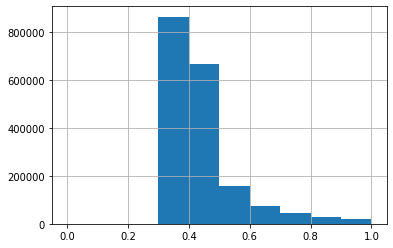

In [4]:
# Looking at the target feature, and we see that it is right skewed - lets perform a log transform to help
df['DEPARTURE_DELAY'].hist()

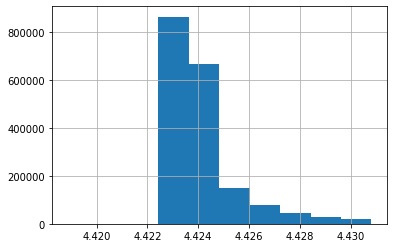

In [3]:
# Created a log from the DEPARTURE_DELAY feature 
# Added 83 because that made all of the values above 0, which plots better visuals


df['LOG_DELAY'] = np.log(df['DEPARTURE_DELAY'])            + 83)
df['LOG_DELAY'].hist();

In [6]:
# Lets look at the correlation between our dataframe
# Using the assumptions of linear regression, none of the features can have multicollinearity
# So lets drop the features that are highly correlated 
df.corr()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,...,ATL,ORD,DFW,DEN,LAX,PHX,SFO,IAH,LAS,MSP
SCHEDULED_DEPARTURE,1.000000,0.970298,0.132322,-0.002689,0.931811,-0.091502,-0.095149,-0.092497,-0.089652,0.552405,...,0.072405,-0.001229,0.012188,-0.002938,-0.033851,-0.025712,-0.007315,-0.008547,-0.023836,-0.012546
DEPARTURE_TIME,0.970298,1.000000,0.173095,0.000901,0.959050,-0.101472,-0.104884,-0.102808,-0.101653,0.568252,...,0.074518,-0.003775,0.015361,-0.000820,-0.036353,-0.032376,-0.006720,-0.002741,-0.025914,-0.014887
DEPARTURE_DELAY,0.132322,0.173095,1.000000,0.046269,0.166933,0.020345,0.020334,0.015805,0.019148,0.060728,...,-0.018779,0.016406,0.007796,-0.000820,0.001144,0.001467,-0.033925,0.032511,-0.012301,-0.003496
TAXI_OUT,-0.002689,0.000901,0.046269,1.000000,0.024479,0.024115,0.128136,0.013565,0.003691,0.018961,...,0.011737,-0.050095,-0.000753,0.020918,-0.080129,-0.008957,0.008642,0.108641,-0.063382,0.019399
WHEELS_OFF,0.931811,0.959050,0.166933,0.024479,1.000000,-0.118702,-0.119756,-0.120752,-0.122322,0.595845,...,0.080539,-0.009462,0.019744,0.003085,-0.041486,-0.042703,-0.002739,0.005957,-0.031293,-0.019426
SCHEDULED_TIME,-0.091502,-0.101472,0.020345,0.024115,-0.118702,1.000000,0.985740,0.992218,0.988720,-0.036615,...,-0.146913,-0.011954,-0.046413,-0.014035,0.028822,0.181150,-0.010087,-0.063192,0.021574,0.135682
ELAPSED_TIME,-0.095149,-0.104884,0.020334,0.128136,-0.119756,0.985740,1.000000,0.991030,0.978024,-0.036996,...,-0.155909,-0.009717,-0.044206,-0.010145,0.030027,0.184102,-0.010727,-0.066463,0.025330,0.136226
AIR_TIME,-0.092497,-0.102808,0.015805,0.013565,-0.120752,0.992218,0.991030,1.000000,0.987679,-0.039271,...,-0.155306,-0.004293,-0.043912,-0.014356,0.038294,0.187480,-0.013629,-0.079337,0.033201,0.132928
DISTANCE,-0.089652,-0.101653,0.019148,0.003691,-0.122322,0.988720,0.978024,0.987679,1.000000,-0.043338,...,-0.172735,0.003163,-0.049699,-0.021808,0.054494,0.204666,-0.023120,-0.098139,0.044257,0.151442
WHEELS_ON,0.552405,0.568252,0.060728,0.018961,0.595845,-0.036615,-0.036996,-0.039271,-0.043338,1.000000,...,0.020024,0.006096,0.022245,0.022173,-0.047653,-0.031586,0.014827,0.012783,-0.013288,-0.020697


In [7]:
final_df = df[['SCHEDULED_DEPARTURE', 'TAXI_OUT', 'SCHEDULED_TIME', 
                 'AIR_TIME', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 
                 'LOG_DELAY', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 
                 'NK', 'OO', 'UA', 'US', 'VX', 'Monday', 'Tuesday', 'Wednesday', 
                 'Thursday', 'Friday', 'Saturday', 'ATL', 'ORD', 'DFW', 'DEN', 
                 'LAX', 'PHX', 'SFO', 'IAH', 'LAS']]

In [8]:
# Lets take a look at the final dataframe that has all features that we need
final_df.head()

,SCHEDULED_DEPARTURE,TAXI_OUT,SCHEDULED_TIME,AIR_TIME,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,LOG_DELAY,AA,AS,...,Saturday,ATL,ORD,DFW,DEN,LAX,PHX,SFO,IAH,LAS
0,0.003817,0.055276,0.420784,0.420792,0.012146,0.317642,0.189781,0.644818,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.008058,0.075377,0.431005,0.425743,0.040486,0.341391,0.223844,0.675652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.008058,0.070352,0.429302,0.412541,0.028340,0.340967,0.189781,0.660532,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.010178,0.085427,0.313458,0.326733,0.020243,0.254877,0.231144,0.660532,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.010178,0.050251,0.252129,0.240924,0.016194,0.222646,0.170316,0.655362,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
final_df.corr()

,SCHEDULED_DEPARTURE,TAXI_OUT,SCHEDULED_TIME,AIR_TIME,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,LOG_DELAY,AA,AS,...,Saturday,ATL,ORD,DFW,DEN,LAX,PHX,SFO,IAH,LAS
SCHEDULED_DEPARTURE,1.000000,-0.002689,-0.091502,-0.092497,-0.063149,0.566929,0.101889,0.138584,-0.046172,0.001902,...,-0.017167,0.072405,-0.001229,0.012188,-0.002938,-0.033851,-0.025712,-0.007315,-0.008547,-0.023836
TAXI_OUT,-0.002689,1.000000,0.024115,0.013565,0.007350,0.016675,0.374918,0.046995,0.008264,0.000533,...,-0.043484,0.011737,-0.050095,-0.000753,0.020918,-0.080129,-0.008957,0.008642,0.108641,-0.063382
SCHEDULED_TIME,-0.091502,0.024115,1.000000,0.992218,0.183046,-0.036292,-0.064433,0.026094,0.176371,0.047290,...,0.012525,-0.146913,-0.011954,-0.046413,-0.014035,0.028822,0.181150,-0.010087,-0.063192,0.021574
AIR_TIME,-0.092497,0.013565,0.992218,1.000000,0.167044,-0.039216,-0.025584,0.021177,0.168044,0.052883,...,0.013001,-0.155306,-0.004293,-0.043912,-0.014356,0.038294,0.187480,-0.013629,-0.079337,0.033201
TAXI_IN,-0.063149,0.007350,0.183046,0.167044,1.000000,-0.008848,0.152910,-0.007164,0.112259,-0.003570,...,-0.002243,-0.077408,0.003013,-0.016966,0.021579,0.025080,0.025838,0.023183,-0.018790,0.001613
SCHEDULED_ARRIVAL,0.566929,0.016675,-0.036292,-0.039216,-0.008848,1.000000,0.081383,0.104887,-0.001740,-0.004361,...,-0.002483,0.017761,0.012689,0.022481,0.023776,-0.048897,-0.030861,0.017368,0.010131,-0.013715
ARRIVAL_DELAY,0.101889,0.374918,-0.064433,-0.025584,0.152910,0.081383,1.000000,0.826320,-0.031862,-0.020905,...,-0.041167,-0.039665,0.021369,0.015296,0.012416,0.003846,0.004414,-0.030046,0.018769,0.001143
LOG_DELAY,0.138584,0.046995,0.026094,0.021177,-0.007164,0.104887,0.826320,1.000000,-0.021316,-0.046731,...,-0.031440,-0.013820,0.017451,0.006720,-0.002146,0.000843,0.001712,-0.035714,0.031526,-0.011963
AA,-0.046172,0.008264,0.176371,0.168044,0.112259,-0.001740,-0.031862,-0.021316,1.000000,-0.049535,...,0.009296,-0.170240,-0.108011,0.427306,-0.084948,-0.050367,0.016444,-0.071824,0.032134,0.032891
AS,0.001902,0.000533,0.047290,0.052883,-0.003570,-0.004361,-0.020905,-0.046731,-0.049535,1.000000,...,0.004725,-0.049802,-0.014933,-0.024604,-0.026707,0.041709,0.084090,-0.017640,-0.025322,0.005483


In [10]:
final_df.columns

Index(['SCHEDULED_DEPARTURE', 'TAXI_OUT', 'SCHEDULED_TIME', 'AIR_TIME',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 'LOG_DELAY', 'AA',
       'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US', 'VX',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'PHX', 'SFO', 'IAH', 'LAS'],
      dtype='object')

In [11]:
# For the sake of not leading you down a dead end path, I will not show the work where I ran and tested
# models using Linear Regression - beause after I ran and trained those models, when I plotted my QQ 
# plot, the errors were not distributed normally.  So Linear Regression does not apply and I had to 
# pivot and use quantile regression.  This is very similar to Linear Regression, and simply put, does
# not have the assumption that the erros have to be normally distributed. 

In [12]:
# Here I am defining my target variable (Departure Delay...which is what we are trying to predict)
# versus all of the other features in our dataframe.


X = final_df.drop(columns='LOG_DELAY')
y = final_df['LOG_DELAY']

In [13]:
mod = smf.quantreg('LOG_DELAY ~' + '+'.join(list(X)), final_df)
res = mod.fit(q=.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:              LOG_DELAY   Pseudo R-squared:               0.8854
Model:                       QuantReg   Bandwidth:                   0.0001578
Method:                 Least Squares   Sparsity:                     0.008477
Date:                Sun, 06 Oct 2019   No. Observations:              1859639
Time:                        11:21:43   Df Residuals:                  1859603
                                        Df Model:                           35
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4195   2.39e-05   1.76e+04      0.000       0.419       0.420
SCHEDULED_DEPARTURE     0.0009   1.86e-05     46.118      0.000       0.001       0.001
TAXI_OUT               -0.8138   8.58e-05  -9487.811      0.000      -0.814      -0.814
SCHEDULED_TIME          2.4189      0.000   1.05e+04      0.000       2.418       2.419
AIR_TIME               -2.4943      0.000  -1.02e+04      0.000      -2.495      -2.494
TAXI_IN                -1.0154      0.000  -6217.624      0.000      -1.016      -1.015
SCHEDULED_ARRIVAL       0.0006   1.72e-05     34.562      0.000       0.001       0.001
ARRIVAL_DELAY           1.6899   6.93e-05   2.44e+04      0.000       1.690       1.690
AA                     -0.0023   1.39e-05   -162.032      0.000      -0.002      -0.002
AS                     -0.0040   2.84e-05   -142.736      0.000      -0.004      -0.004
B6                     -0.0017   3.46e-05    -50.134      0.000      -0.002      -0.002
DL                     -0.0010   1.32e-05    -78.202      0.000      -0.001      -0.001
EV                     -0.0023   1.49e-05   -155.293      0.000      -0.002      -0.002
F9                     -0.0030   2.29e-05   -131.633      0.000      -0.003      -0.003
HA                     -0.0035   7.54e-05    -46.318      0.000      -0.004      -0.003
MQ                     -0.0016   1.82e-05    -87.071      0.000      -0.002      -0.002
NK                     -0.0020   2.22e-05    -89.654      0.000      -0.002      -0.002
OO                     -0.0022   1.36e-05   -165.360      0.000      -0.002      -0.002
UA                     -0.0007   1.37e-05    -50.704      0.000      -0.001      -0.001
US                     -0.0024   2.13e-05   -114.903      0.000      -0.002      -0.002
VX                     -0.0010   2.62e-05    -38.144      0.000      -0.001      -0.001
Monday               4.351e-05   1.16e-05      3.764      0.000    2.09e-05    6.62e-05
Tuesday                -0.0001   1.16e-05     -9.216      0.000      -0.000   -8.41e-05
Wednesday           -7.799e-05   1.15e-05     -6.763      0.000      -0.000   -5.54e-05
Thursday                0.0002   1.15e-05     13.407      0.000       0.000       0.000
Friday                  0.0002   1.16e-05     14.379      0.000       0.000       0.000
Saturday               -0.0001   1.22e-05     -8.625      0.000      -0.000   -8.11e-05
ATL                     0.0011   1.59e-05     68.530      0.000       0.001       0.001
ORD                     0.0007   1.56e-05     45.287      0.000       0.001       0.001
DFW                     0.0010   1.67e-05     58.976      0.000       0.001       0.001
DEN                     0.0008   1.71e-05     48.557      0.000       0.001       0.001
LAX                     0.0001   1.73e-05      8.618      0.000       0.000       0.000
PHX                     0.0005   1.52e-05     35.760      0.000       0.001       0.001
SFO                     0.0005   1.83e-05     27.316      0.000       0.000       0.001
IAH                     0.0009   1.52e-05     60.768      0.000 

In [14]:
# Got a good r**2 number, which is good.  Lets do a train test spilt, so we can predict!

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [16]:
both_train = pd.concat([X_train, y_train], axis=1)
both_train.head()

,SCHEDULED_DEPARTURE,TAXI_OUT,SCHEDULED_TIME,AIR_TIME,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,AA,AS,B6,...,ATL,ORD,DFW,DEN,LAX,PHX,SFO,IAH,LAS,LOG_DELAY
179528,0.610263,0.035176,0.023850,0.026403,0.008097,0.647159,0.177616,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.675652
539647,0.856234,0.100503,0.149915,0.140264,0.020243,0.941476,0.204380,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.675652
206559,0.771416,0.075377,0.061329,0.066007,0.016194,0.817642,0.199513,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.660532
736522,0.555131,0.090452,0.461670,0.468647,0.036437,0.896098,0.243309,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665636
1097521,0.424512,0.065327,0.141397,0.127063,0.012146,0.490670,0.223844,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.764064


In [17]:
y_pred = res.predict(X_test)
y_hat_train = res.predict(X_train)

In [18]:
y_test1 = y_test.to_frame()
y_test1.head()

,LOG_DELAY
491422,0.726671
364916,0.644818
1743268,0.665636
1804597,0.685425
1314814,0.685425


In [19]:
df_y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [20]:
# Combining the two data sets
pred_actual = pd.concat([y_test1, df_y_pred], axis=1)
pred_actual.head()

,LOG_DELAY,Predicted
491422,0.726671,0.720209
364916,0.644818,0.650156
1743268,0.665636,0.666587
1804597,0.685425,0.683244
1314814,0.685425,0.682363
